# Customer Churn Analysis

This notebook is using customer churn data from Kaggle (https://www.kaggle.com/sandipdatta/customer-churn-analysis) and has been adopted from the notebook available on Kaggle developed by SanD.

The notebook will go through the following steps:
    1. Import Dataset
    2. Analyze the Data
    3. Prepare the data model building
    4. Split data in test and train data
    5. Train model using various machine learning algorithms for binary classification
    6. Evaluate the models
    7. Select the model best fit for the given data set

In [2]:
from sklearn import model_selection
from sklearn import tree
from sklearn import svm
from sklearn import ensemble
from sklearn import neighbors
from sklearn import linear_model
from sklearn import metrics
from sklearn import preprocessing

In [3]:
%matplotlib inline 

from IPython.display import Image
import matplotlib as mlp
import matplotlib.pyplot as plt
import numpy as np
import os
import pandas as pd
import sklearn
import seaborn as sns

## Dataset

The original dataset can be downloaded from https://www.kaggle.com/becksddf/churn-in-telecoms-dataset/data. Then upload it to IBM Watson Studio and insert the code to read the data using "insert to code > Insert panndas DataFrame".

In [4]:
# @hidden_cell
import types
import pandas as pd
from botocore.client import Config
import ibm_boto3

def __iter__(self): return 0

# @hidden_cell
# The following code accesses a file in your IBM Cloud Object Storage. It includes your credentials.
# You might want to remove those credentials before you share the notebook.
client_abc8adf276ed4155b85320acd6c03a69 = ibm_boto3.client(service_name='s3',
    ibm_api_key_id='XXXXX',
    ibm_auth_endpoint="https://iam.ng.bluemix.net/oidc/token",
    config=Config(signature_version='oauth'),
    endpoint_url='https://s3-api.us-geo.objectstorage.service.networklayer.com')

body = client_abc8adf276ed4155b85320acd6c03a69.get_object(Bucket='richhproject1-donotdelete-pr-vdi0oj1mgnvqrg',Key='customer-churn-kaggle.csv')['Body']
# add missing __iter__ method, so pandas accepts body as file-like object
if not hasattr(body, "__iter__"): body.__iter__ = types.MethodType( __iter__, body )

df = pd.read_csv(body)
df.head()

print (df.shape)

(3333, 21)


Examine the first 5 lines of the input

In [5]:
df.head()

,state,account length,area code,phone number,international plan,voice mail plan,number vmail messages,total day minutes,total day calls,total day charge,...,total eve calls,total eve charge,total night minutes,total night calls,total night charge,total intl minutes,total intl calls,total intl charge,customer service calls,churn
0,KS,128,415,382-4657,no,yes,25,265.1,110,45.07,...,99,16.78,244.7,91,11.01,10.0,3,2.70,1,False
1,OH,107,415,371-7191,no,yes,26,161.6,123,27.47,...,103,16.62,254.4,103,11.45,13.7,3,3.70,1,False
2,NJ,137,415,358-1921,no,no,0,243.4,114,41.38,...,110,10.30,162.6,104,7.32,12.2,5,3.29,0,False
3,OH,84,408,375-9999,yes,no,0,299.4,71,50.90,...,88,5.26,196.9,89,8.86,6.6,7,1.78,2,False
4,OK,75,415,330-6626,yes,no,0,166.7,113,28.34,...,122,12.61,186.9,121,8.41,10.1,3,2.73,3,False


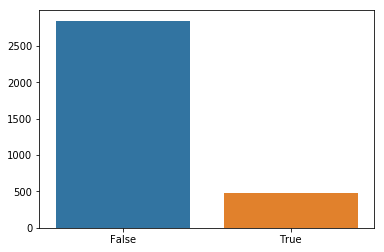

In [6]:
y = df["churn"].value_counts()
sns.barplot(y.index, y.values)

In [7]:
y_True = df["churn"][df["churn"] == True]
print ("Churn Percentage = "+str( (y_True.shape[0] / df["churn"].shape[0]) * 100 ))

Churn Percentage = 14.491449144914492


## Descriptive Analysis of the Data

In [8]:
  df.describe()

,account length,area code,number vmail messages,total day minutes,total day calls,total day charge,total eve minutes,total eve calls,total eve charge,total night minutes,total night calls,total night charge,total intl minutes,total intl calls,total intl charge,customer service calls
count,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000
mean,101.064806,437.182418,8.099010,179.775098,100.435644,30.562307,200.980348,100.114311,17.083540,200.872037,100.107711,9.039325,10.237294,4.479448,2.764581,1.562856
std,39.822106,42.371290,13.688365,54.467389,20.069084,9.259435,50.713844,19.922625,4.310668,50.573847,19.568609,2.275873,2.791840,2.461214,0.753773,1.315491
min,1.000000,408.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,23.200000,33.000000,1.040000,0.000000,0.000000,0.000000,0.000000
25%,74.000000,408.000000,0.000000,143.700000,87.000000,24.430000,166.600000,87.000000,14.160000,167.000000,87.000000,7.520000,8.500000,3.000000,2.300000,1.000000
50%,101.000000,415.000000,0.000000,179.400000,101.000000,30.500000,201.400000,100.000000,17.120000,201.200000,100.000000,9.050000,10.300000,4.000000,2.780000,1.000000
75%,127.000000,510.000000,20.000000,216.400000,114.000000,36.790000,235.300000,114.000000,20.000000,235.300000,113.000000,10.590000,12.100000,6.000000,3.270000,2.000000
max,243.000000,510.000000,51.000000,350.800000,165.000000,59.640000,363.700000,170.000000,30.910000,395.000000,175.000000,17.770000,20.000000,20.000000,5.400000,9.000000


### Churn by State 

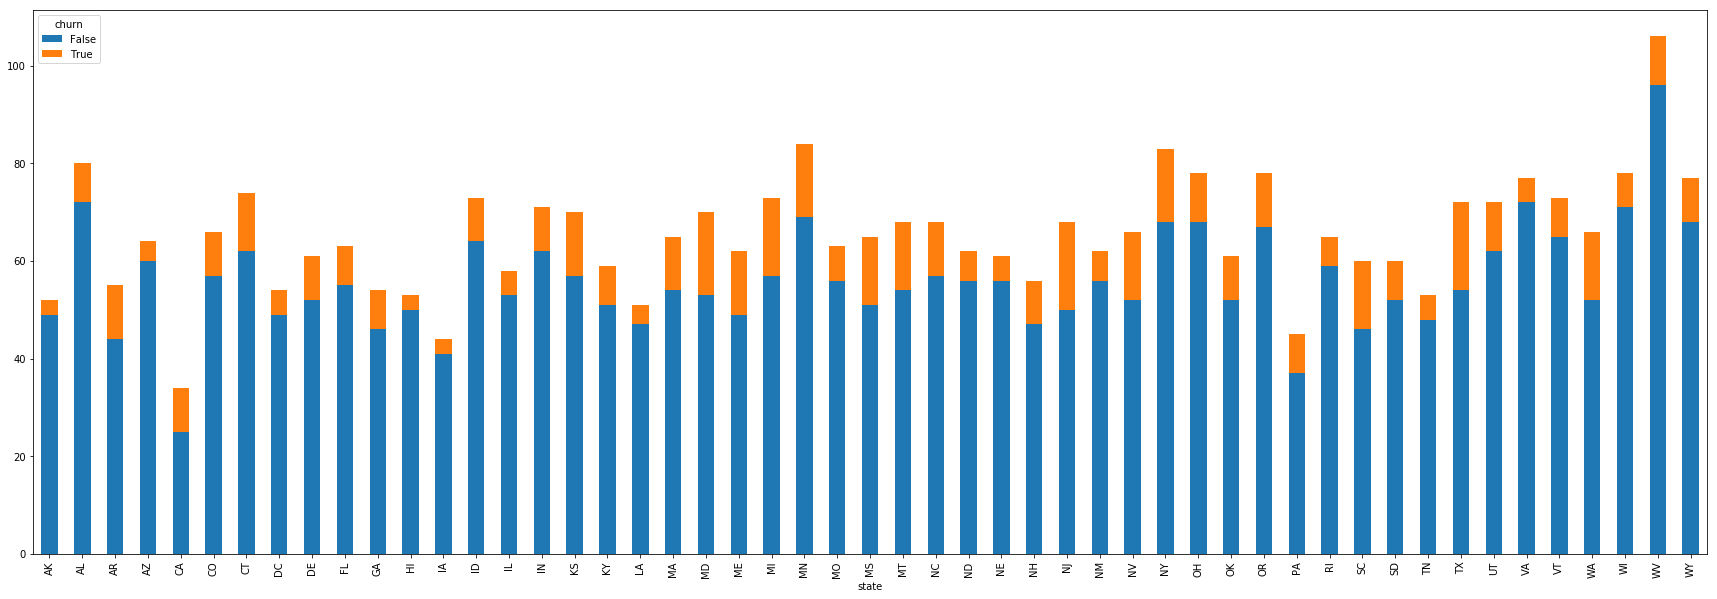

In [9]:
df.groupby(["state", "churn"]).size().unstack().plot(kind='bar', stacked=True, figsize=(30,10)) 

### Churn by Area Code 

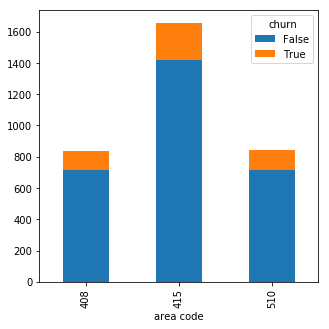

In [10]:
df.groupby(["area code", "churn"]).size().unstack().plot(kind='bar', stacked=True, figsize=(5,5)) 

###  Churn by customers with International Plan 

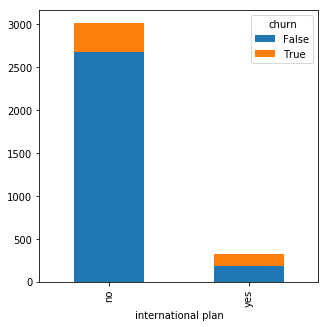

In [11]:
df.groupby(["international plan", "churn"]).size().unstack().plot(kind='bar', stacked=True, figsize=(5,5)) 

### Churn By Customers with Voice mail plan

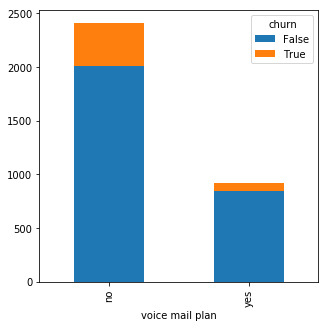

In [12]:
df.groupby(["voice mail plan", "churn"]).size().unstack().plot(kind='bar', stacked=True, figsize=(5,5)) 

## Data Preparation

The following preprocessing steps need to be done:
1. Turn categorical variables into discrete numerical variables
2. Create response vector
3. Drop superflous columns
4. Build feature matrix
5. Standardize feature matrix values

### Encode categorical columns

In [13]:
# Discreet value integer encoder
label_encoder = preprocessing.LabelEncoder()

# State, international plans and voice mail plan are strings and we want discreet integer values
df['state'] = label_encoder.fit_transform(df['state'])
df['international plan'] = label_encoder.fit_transform(df['international plan'])
df['voice mail plan'] = label_encoder.fit_transform(df['voice mail plan'])

In [14]:
print (df.shape)
df.head()

(3333, 21)


,state,account length,area code,phone number,international plan,voice mail plan,number vmail messages,total day minutes,total day calls,total day charge,...,total eve calls,total eve charge,total night minutes,total night calls,total night charge,total intl minutes,total intl calls,total intl charge,customer service calls,churn
0,16,128,415,382-4657,0,1,25,265.1,110,45.07,...,99,16.78,244.7,91,11.01,10.0,3,2.70,1,False
1,35,107,415,371-7191,0,1,26,161.6,123,27.47,...,103,16.62,254.4,103,11.45,13.7,3,3.70,1,False
2,31,137,415,358-1921,0,0,0,243.4,114,41.38,...,110,10.30,162.6,104,7.32,12.2,5,3.29,0,False
3,35,84,408,375-9999,1,0,0,299.4,71,50.90,...,88,5.26,196.9,89,8.86,6.6,7,1.78,2,False
4,36,75,415,330-6626,1,0,0,166.7,113,28.34,...,122,12.61,186.9,121,8.41,10.1,3,2.73,3,False


### Create response vector

In [15]:
y = df['churn'].values.astype(np.int)
y.size

3333

### Drop superflous columns

In [16]:
# df = df.drop(["Id","Churn"], axis = 1, inplace=True)
df.drop(["phone number","churn"], axis = 1, inplace=True)
df.head()

,state,account length,area code,international plan,voice mail plan,number vmail messages,total day minutes,total day calls,total day charge,total eve minutes,total eve calls,total eve charge,total night minutes,total night calls,total night charge,total intl minutes,total intl calls,total intl charge,customer service calls
0,16,128,415,0,1,25,265.1,110,45.07,197.4,99,16.78,244.7,91,11.01,10.0,3,2.70,1
1,35,107,415,0,1,26,161.6,123,27.47,195.5,103,16.62,254.4,103,11.45,13.7,3,3.70,1
2,31,137,415,0,0,0,243.4,114,41.38,121.2,110,10.30,162.6,104,7.32,12.2,5,3.29,0
3,35,84,408,1,0,0,299.4,71,50.90,61.9,88,5.26,196.9,89,8.86,6.6,7,1.78,2
4,36,75,415,1,0,0,166.7,113,28.34,148.3,122,12.61,186.9,121,8.41,10.1,3,2.73,3


### Build feature matrix

In [17]:
X = df.values.astype(np.float)
print(X)
X.shape

[[ 16.   128.   415.   ...   3.     2.7    1.  ]
 [ 35.   107.   415.   ...   3.     3.7    1.  ]
 [ 31.   137.   415.   ...   5.     3.29   0.  ]
 ...
 [ 39.    28.   510.   ...   6.     3.81   2.  ]
 [  6.   184.   510.   ...  10.     1.35   2.  ]
 [ 42.    74.   415.   ...   4.     3.7    0.  ]]


(3333, 19)

### Standardize Feature Matrix values

In [18]:
scaler = preprocessing.StandardScaler()
X = scaler.fit_transform(X)
X

array([[-0.6786493 ,  0.67648946, -0.52360328, ..., -0.60119509,
        -0.0856905 , -0.42793202],
       [ 0.6031696 ,  0.14906505, -0.52360328, ..., -0.60119509,
         1.2411686 , -0.42793202],
       [ 0.33331299,  0.9025285 , -0.52360328, ...,  0.21153386,
         0.69715637, -1.1882185 ],
       ...,
       [ 0.87302621, -1.83505538,  1.71881732, ...,  0.61789834,
         1.3871231 ,  0.33235445],
       [-1.35329082,  2.08295458,  1.71881732, ...,  2.24335625,
        -1.87695028,  0.33235445],
       [ 1.07541867, -0.67974475, -0.52360328, ..., -0.19483061,
         1.2411686 , -1.1882185 ]])

This completes the data preparation steps.

## Split Train/Test Validation Data

We need to adopt Stratified Cross Validation - Since the Response values are not balanced

In [19]:
def stratified_cv(X, y, clf_class, shuffle=True, n_folds=10):
    stratified_k_fold = model_selection.StratifiedKFold(n_splits=n_folds, shuffle=shuffle)
    y_pred = y.copy()
    # ii -> train
    # jj -> test indices
    for ii, jj in stratified_k_fold.split(X, y): 
        X_train, X_test = X[ii], X[jj]
        y_train = y[ii]
        clf = clf_class
        clf.fit(X_train,y_train)
        y_pred[jj] = clf.predict(X_test)
    return y_pred

## Build Models and Train

We will build models using a variety of approaches to see how they compare:

In [20]:
# create classifiers
from sklearn.ensemble import GradientBoostingClassifier
gradient_boost = GradientBoostingClassifier()

from sklearn.svm import SVC
svc_model = SVC(gamma='auto')

from sklearn.ensemble import RandomForestClassifier
random_forest = RandomForestClassifier(n_estimators=10)

from sklearn.neighbors import KNeighborsClassifier
k_neighbors = KNeighborsClassifier()

from sklearn.linear_model import LogisticRegression
logistic_regression = LogisticRegression(solver='lbfgs')

In [21]:
print('Gradient Boosting Classifier:  {:.2f}'.format(metrics.accuracy_score(y, stratified_cv(X, y, gradient_boost))))
print('Support vector machine(SVM):   {:.2f}'.format(metrics.accuracy_score(y, stratified_cv(X, y, svc_model))))
print('Random Forest Classifier:      {:.2f}'.format(metrics.accuracy_score(y, stratified_cv(X, y, random_forest))))
print('K Nearest Neighbor Classifier: {:.2f}'.format(metrics.accuracy_score(y, stratified_cv(X, y, k_neighbors))))
print('Logistic Regression:           {:.2f}'.format(metrics.accuracy_score(y, stratified_cv(X, y, logistic_regression))))

Gradient Boosting Classifier:  0.95
Support vector machine(SVM):   0.92
Random Forest Classifier:      0.94
K Nearest Neighbor Classifier: 0.89
Logistic Regression:           0.86


## Model Evaluation

We will now generate confusion matrices for the various models to analyze the prediction in more detail.

### Gradient Boosting Classifier

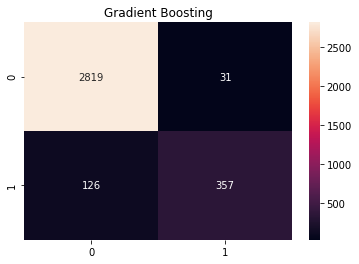

In [22]:
grad_ens_conf_matrix = metrics.confusion_matrix(y, stratified_cv(X, y, gradient_boost))
sns.heatmap(grad_ens_conf_matrix, annot=True,  fmt='');
title = 'Gradient Boosting'
plt.title(title);

### Support Vector Machines

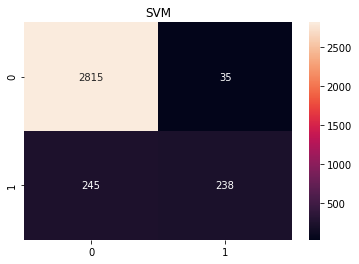

In [23]:
svm_svc_conf_matrix = metrics.confusion_matrix(y, stratified_cv(X, y, svc_model))
sns.heatmap(svm_svc_conf_matrix, annot=True,  fmt='');
title = 'SVM'
plt.title(title);

### Random Forest

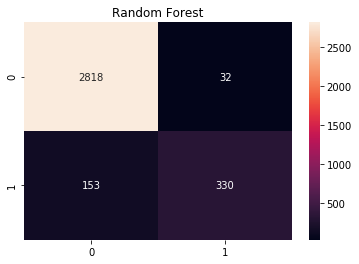

In [24]:
random_forest_conf_matrix = metrics.confusion_matrix(y, stratified_cv(X, y, random_forest))
sns.heatmap(random_forest_conf_matrix, annot=True,  fmt='');
title = 'Random Forest'
plt.title(title);

### Classification Report

In [25]:
print('Gradient Boosting Classifier:\n {}\n'.format(metrics.classification_report(y, stratified_cv(X, y, gradient_boost))))
print('Support vector machine(SVM):\n {}\n'.format(metrics.classification_report(y, stratified_cv(X, y, svc_model))))
print('Random Forest Classifier:\n {}\n'.format(metrics.classification_report(y, stratified_cv(X, y, random_forest))))

Gradient Boosting Classifier:
               precision    recall  f1-score   support

           0       0.96      0.99      0.97      2850
           1       0.91      0.73      0.81       483

   micro avg       0.95      0.95      0.95      3333
   macro avg       0.93      0.86      0.89      3333
weighted avg       0.95      0.95      0.95      3333


Support vector machine(SVM):
               precision    recall  f1-score   support

           0       0.92      0.99      0.95      2850
           1       0.89      0.50      0.64       483

   micro avg       0.92      0.92      0.92      3333
   macro avg       0.91      0.75      0.80      3333
weighted avg       0.92      0.92      0.91      3333


Random Forest Classifier:
               precision    recall  f1-score   support

           0       0.94      0.99      0.97      2850
           1       0.93      0.64      0.76       483

   micro avg       0.94      0.94      0.94      3333
   macro avg       0.93      0.82     

## Final Model Selection

Gradient Boosting seems to do comparatively better for this case

In [26]:
gbc = ensemble.GradientBoostingClassifier()
gbc.fit(X, y)

GradientBoostingClassifier(criterion='friedman_mse', init=None,
              learning_rate=0.1, loss='deviance', max_depth=3,
              max_features=None, max_leaf_nodes=None,
              min_impurity_decrease=0.0, min_impurity_split=None,
              min_samples_leaf=1, min_samples_split=2,
              min_weight_fraction_leaf=0.0, n_estimators=100,
              n_iter_no_change=None, presort='auto', random_state=None,
              subsample=1.0, tol=0.0001, validation_fraction=0.1,
              verbose=0, warm_start=False)

[0.00231965 0.00328351 0.00092648 0.09486837 0.02245592 0.06108225
 0.17959752 0.00385574 0.11057833 0.08123595 0.00135536 0.06056395
 0.01024578 0.00122899 0.00843451 0.056446   0.11086928 0.02722142
 0.16343101]


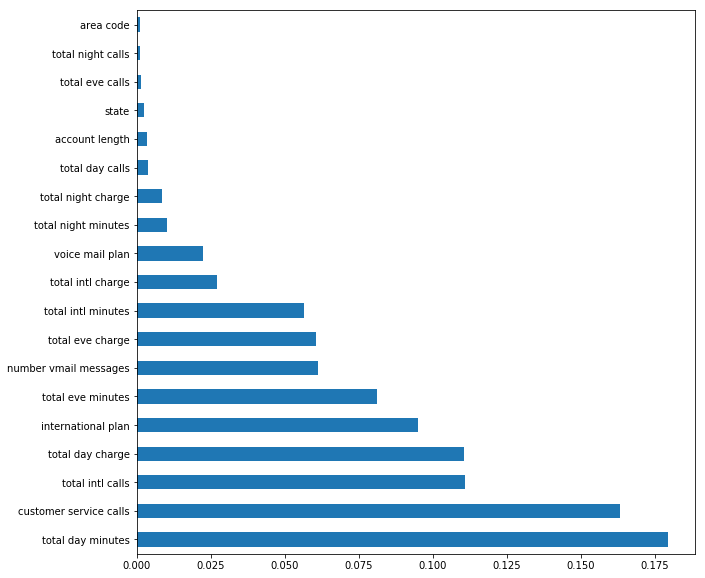

In [27]:
# Get Feature Importance from the classifier
feature_importance = gbc.feature_importances_
print (gbc.feature_importances_)
feat_importances = pd.Series(gbc.feature_importances_, index=df.columns)
feat_importances = feat_importances.nlargest(19)
feat_importances.plot(kind='barh' , figsize=(10,10)) 

## Deploy Model to Watson Machine Learning service

In [28]:
#hidden cell
wml_credentials = {
  "apikey": "XXXXX",
  "iam_apikey_description": "Auto generated apikey during resource-key operation for Instance - crn:v1:bluemix:public:pm-20:us-south:a/47b84451ab70b94737518f7640a9ee42:4a7f62cc-XXXXX-8af4-b9f53533d2cf::",
  "iam_apikey_name": "auto-generated-apikey-8817c181-XXXXX-bb0a-01d12ef39eb9",
  "iam_role_crn": "crn:v1:bluemix:public:iam::::serviceRole:Writer",
  "iam_serviceid_crn": "crn:v1:bluemix:public:iam-identity::a/47b84451ab70b94737518f7640a9ee42::serviceid:ServiceId-222b7622-bac4-4c7f-889d-e793c57c7d62",
  "instance_id": "4a7f62cc-f564-4144-8af4-b9f53533d2cf",
  "password": "3e925562-XXXXX-99fe-4ed239d409a1",
  "url": "https://us-south.ml.cloud.ibm.com",
  "username": "8817c181-XXXXX-bb0a-01d12ef39eb9"
}

In [29]:
from watson_machine_learning_client import WatsonMachineLearningAPIClient
client = WatsonMachineLearningAPIClient(wml_credentials)

meta_props={client.repository.ModelMetaNames.NAME: "Gradient Boost model to predict customer churn"}
published_model = client.repository.store_model(model=gbc, meta_props={client.repository.ModelMetaNames.NAME: "Gradient Boost model to predict customer churn"})

In [30]:
#get uid for the stored model
published_model_uid = client.repository.get_model_uid(published_model)
model_details = client.repository.get_details(published_model_uid)

In [31]:
#create deployment
created_deployment = client.deployments.create(published_model_uid, name="customer_churn_model")



#######################################################################################

Synchronous deployment creation for uid: 'be019a23-446e-43e7-ade1-d5a1333abb17' started

#######################################################################################


INITIALIZING
DEPLOY_SUCCESS


------------------------------------------------------------------------------------------------
Successfully finished deployment creation, deployment_uid='36c7692b-df1e-493e-a833-7381c02aaf76'
------------------------------------------------------------------------------------------------




## Score the deployed model

In [32]:
#get scoring end point
scoring_endpoint = client.deployments.get_scoring_url(created_deployment)
print(scoring_endpoint)

https://us-south.ml.cloud.ibm.com/v3/wml_instances/4a7f62cc-f564-4144-8af4-b9f53533d2cf/deployments/36c7692b-df1e-493e-a833-7381c02aaf76/online


In [33]:
# Test data
scoring_payload = {'fields': ['state', 'account length', 'area code', 'international plan', 'voice mail plan',
        'number vmail messages', 'total day minutes', 'total day calls', 'total day charge', 'total eve minutes', 'total eve calls',
        'total eve charge', 'total night minutes', 'total night calls', 'total night charge', 'total intl minutes', 'total intl calls',
        'total intl charge', 'customer service calls'], 
                   'values': [[10,161,415,0,0,0,332.9,67,56.59,317.8,97,27.01,160.6,128,7.23,5.4,9,1.46,4]]}


In [34]:
predictions = client.deployments.score(scoring_endpoint, scoring_payload)

In [35]:
import json
print('prediction',json.dumps(predictions, indent=2))

prediction {
  "fields": [
    "prediction",
    "probability"
  ],
  "values": [
    [
      1,
      [
        0.00021061113051734637,
        0.9997893888694827
      ]
    ]
  ]
}


## Acknowledgement

The approach and code fragments have been adopted from the nootebook on Kaggle by Sandip Datta (https://www.kaggle.com/sandipdatta). 
The full original notebook can be viewed here: https://www.kaggle.com/sandipdatta/customer-churn-analysis#